<a href="https://colab.research.google.com/github/ManoMax/google-collabs/blob/main/lab1_visualizacao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Grupo D

In [ ]:
!pip install geopandas

#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#lendo dataset
dataset = pd.read_csv('/content/cota-parlamentar.csv')
dataset.head()

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,...,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,56,2020-02-01 00:00:00,7007086,NaN,0,NaN,2442,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN,998.0,0.0,998.0,NaN
1,56,2020-02-13 00:00:00,7017162,NaN,4,NaN,2442,2019,2020,0,...,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN,4920.0,0.0,4920.0,NaN
2,56,2020-02-04 00:00:00,7007754,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN,511.0,0.0,511.0,NaN
3,56,2020-02-18 00:00:00,7018634,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,311,NaN,NaN,186.0,0.0,186.0,NaN
4,56,2020-02-11 00:00:00,7011106,NaN,4,NaN,2442,2019,2020,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,23,NaN,NaN,740.0,0.0,740.0,NaN


In [ ]:
#filtrando dados para aparecer apenas os dados de 2019
dataset_2019 = dataset.query("numano == 2019")
dataset_2019

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,...,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
8413,56,2019-06-06 00:00:00,6862742,NaN,0,NaN,3175,2019,2019,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ANA CAROLINA MOURA ALVES 01136994173,001329989,NaN,NaN,2100.00,0.0,2100.00,NaN
8445,56,2019-06-25 00:00:00,6862865,NaN,0,NaN,3175,2019,2019,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,JANE DA SILVA SOARES DE AVELAR 57915873172,001350862,NaN,NaN,1200.00,0.0,1200.00,NaN
8446,56,2019-06-25 00:00:00,6863041,NaN,0,NaN,3175,2019,2019,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,JANE DA SILVA SOARES DE AVELAR 57915873172,001350883,NaN,NaN,1650.00,0.0,1650.00,NaN
8447,56,2019-06-26 00:00:00,6863850,NaN,0,NaN,3175,2019,2019,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,JANE DA SILVA SOARES DE AVELAR 57915873172,001351492,NaN,NaN,1200.00,0.0,1200.00,NaN
8448,56,2019-07-04 00:00:00,6881372,NaN,0,NaN,3175,2019,2019,0,...,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,JANE DA SILVA SOARES DE AVELAR 57915873172,001364994,NaN,NaN,1200.00,0.0,1200.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088430,56,2019-12-11 00:00:00,1722567,212625.0,0,548.0,3463,2019,2019,0,...,Emissão Bilhete Aéreo,NaN,Cia Aérea - TAM,Bilhete: 957-2119.805851,Dr. Gonçalo,BSB/THE,1720.57,0.0,1720.57,NaN
3088431,56,2019-12-11 00:00:00,1722568,212625.0,0,548.0,3463,2019,2019,0,...,Emissão Bilhete Aéreo,NaN,Cia Aérea - TAM,Bilhete: 957-2119.806918,Dr. Gonçalo,THE/BSB,1925.79,0.0,1925.79,NaN
3088432,56,2019-12-11 00:00:00,1722569,212625.0,0,548.0,3463,2019,2019,0,...,Emissão Bilhete Aéreo,NaN,Cia Aérea - TAM,Bilhete: 957-2119.806995,Dr. Gonçalo,BSB/THE,1930.57,0.0,1930.57,NaN
3088433,56,2019-12-18 00:00:00,6995992,212749.0,0,551.0,3465,2019,2019,0,...,PASSAGENS AÉREAS,NaN,LATAM AIRLINES,9572120411039,NaN,NaN,1890.66,0.0,1890.66,NaN


In [ ]:
#encontrando numero de parlamentares em cada estado
qtd_parlamentares = dataset_2019.groupby(['sguf', 'nudeputadoid']).size().reset_index(name='counts')
qtd_parlamentares_uf = qtd_parlamentares.groupby('sguf')['nudeputadoid'].count()
qtd_parlamentares_uf

sguf
AC     14
AL     14
AM     14
AP     14
BA     55
CE     35
DF     14
ES     16
GO     27
MA     32
MG     81
MS     16
MT     15
PA     26
PB     18
PE     37
PI     15
PR     45
RJ     80
RN     12
RO     13
RR     12
RS     46
SC     27
SE     12
SP    102
TO     12
Name: nudeputadoid, dtype: int64

In [ ]:
#encontrando valor total de gastos em cada estado
gasto_total_uf = dataset_2019.groupby(by=['sguf']).sum().groupby(level=[0]).cumsum()['vlrliquido']
gasto_total_uf

sguf
AC     4144572.95
AL     3871093.26
AM     3865131.56
AP     4012855.00
BA    17261252.76
CE    10373280.87
DF     1753029.99
ES     3430166.32
GO     5840747.09
MA     8048453.64
MG    19203657.66
MS     3029294.64
MT     3071774.91
PA     7975258.33
PB     5470679.85
PE    10700793.96
PI     4524902.02
PR    11950039.05
RJ    17477652.16
RN     3450292.36
RO     3075805.69
RR     3971069.49
RS    12158185.33
SC     5286164.07
SE     3650849.27
SP    25018524.51
TO     3422022.85
Name: vlrliquido, dtype: float64

In [ ]:
#criando um dataframe com estados e suas respectivas medias de valor gasto por parlamentar
data = []

for index, value in gasto_total_uf.items():
    data.append([index, value / qtd_parlamentares_uf[index]])


media_gastos_uf = pd.DataFrame(data, columns=['sguf', 'vlrmedia'])
media_gastos_uf

,sguf,vlrmedia
0,AC,296040.925000
1,AL,276506.661429
2,AM,276080.825714
3,AP,286632.500000
4,BA,313840.959273
5,CE,296379.453429
6,DF,125216.427857
7,ES,214385.395000
8,GO,216323.966296
9,MA,251514.176250


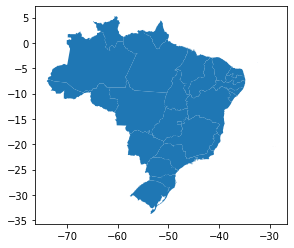

In [ ]:
#testando o geopandas e o dataset geografico
mapa_brasil = gpd.read_file('uf.json')
mapa_brasil.plot()

In [ ]:
#fazendo o merge do dataset geografico com o dataset de media de gasto por parlamentar e corrigindo os estados que ficaram com NaN no lugar da media por nao possuir dados da media
df_merged = mapa_brasil.merge(media_gastos_uf, #map_df merge to df
 left_on=['id'], 
 right_on=['sguf'])

concatRes = pd.concat([mapa_brasil, df_merged]).drop_duplicates()

concatRes['vlrmedia'] = concatRes['vlrmedia'].fillna(0)

concatRes

,id,name,uf,codigo,regiao,geometry,sguf,vlrmedia
0,AC,Acre,Acre,12,Norte,"POLYGON ((-73.80058 -7.11131, -73.73736 -7.134...",NaN,0.000000
1,AL,Alagoas,Alagoas,27,Nordeste,"POLYGON ((-38.23778 -9.32808, -38.20166 -9.296...",NaN,0.000000
2,AM,Amazonas,Amazonas,13,Norte,"POLYGON ((-73.80058 -7.11131, -73.79607 -7.103...",NaN,0.000000
3,AP,Amapá,Amapá,16,Norte,"POLYGON ((-54.86988 2.43485, -54.79763 2.43875...",NaN,0.000000
4,BA,Bahia,Bahia,29,Nordeste,"POLYGON ((-45.72065 -10.15547, -45.71613 -10.1...",NaN,0.000000
5,CE,Ceará,Ceará,23,Nordeste,"POLYGON ((-41.32215 -2.91975, -41.28151 -2.896...",NaN,0.000000
6,DF,DF,DF,53,Centro-Oeste,"POLYGON ((-47.31025 -16.03694, -47.31025 -16.0...",NaN,0.000000
7,ES,Espírito Santo,Espírito Santo,32,Sudeste,"MULTIPOLYGON (((-40.22027 -17.98051, -40.09834...",NaN,0.000000
8,GO,Goiás,Goiás,52,Centro-Oeste,"POLYGON ((-50.51203 -12.86009, -50.49396 -12.8...",NaN,0.000000
9,MA,Maranhão,Maranhão,21,Nordeste,"MULTIPOLYGON (((-48.75534 -5.34727, -48.58373 ...",NaN,0.000000


Text(0.5, 1.0, 'Média de gastos por parlamentar no ano de 2019, de acordo com seus estados de origem')

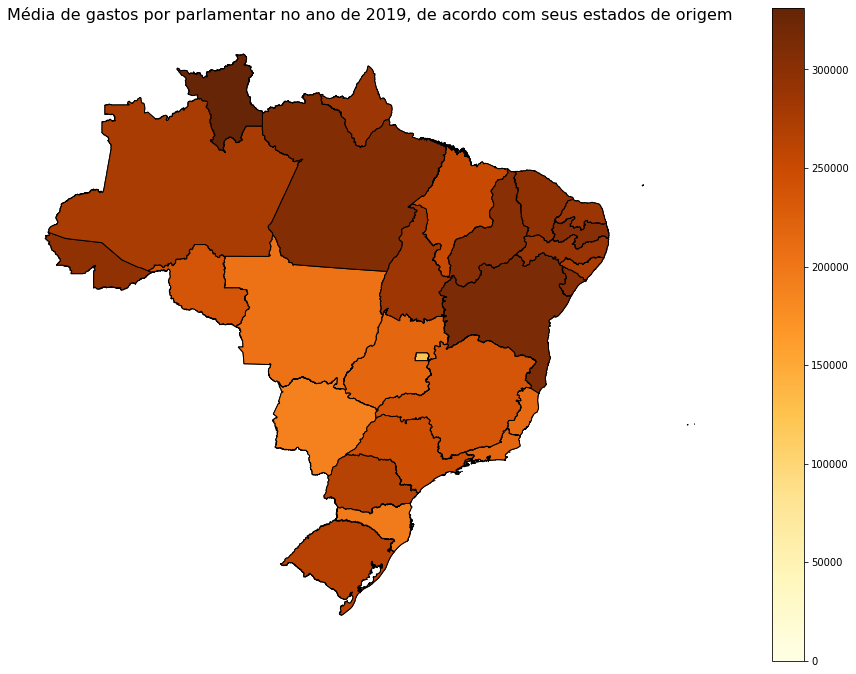

In [ ]:
#plotando grafico com media de valores gastos por parlamentar em cada estado
fig, ax = plt.subplots(1, figsize=(16,12))
concatRes.plot(column='vlrmedia', cmap='YlOrBr', linewidth=1, ax=ax, edgecolor='k', legend = True)
ax.axis('off')

# adicionando título
ax.set_title("Média de gastos por parlamentar no ano de 2019, de acordo com seus estados de origem", fontdict={"fontsize": "16", "fontweight" : "4"})